# About the project #

The goal is **to find some insights from health smart devices data** in order to improve marketing strategy for BellaBeat, a high-tech manufacturer of health-focused
products for women.

I will be using Python along with pandas, matplotlib and seaborn for this data because I'm more comfortable with them.

# Importing libraries #

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ask : understanding the problem

1. What are insights in smart device usage?
2. How can we apply these trends to BellaBeat customers?
3. How can these insights create recommendations for BellaBeat marketing strategy?

# Prepare : What do I need?

For this project, I am using FitBit Fitness Tracker Data. [CLICK HERE](https://www.kaggle.com/datasets/arashnic/fitbit)

Although the sample size is only about 30 it might not represent the who population but for practice we are going to analyze this data.

The dataset we are going to use in this project are
1. dailyActivity_merged
2. sleepDay_merged
3. hourlySteps_merged

In [3]:
# importing dataset
activity = pd.read_csv('./datasets/dailyActivity_merged.csv')
sleep = pd.read_csv('./datasets/sleepDay_merged.csv')
hr_steps = pd.read_csv("./datasets/hourlySteps_merged.csv")

# Process : Cleaning data

In [3]:
# checking na
print('activity na :')
activity.isna().sum()

activity na :


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
print('sleep na :')
sleep.isna().sum()

sleep na :


Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [5]:
print('hr_steps na :')
hr_steps.isna().sum()
# looks like there is no na

hr_steps na :


Id              0
ActivityHour    0
StepTotal       0
dtype: int64

# Checking for duplicates

In [6]:
print('activity : ' +  str(activity.duplicated().sum()))
print('sleep : ' +  str(sleep.duplicated().sum()))
print('hr_steps : ' +  str(hr_steps.duplicated().sum()))

activity : 0
sleep : 3
hr_steps : 0


In [7]:
# there is some duplicate in 'sleep' so we are going to remove it
sleep = sleep[sleep.duplicated() == False]
print('sleep : ' +  str(sleep.duplicated().sum()))

sleep : 0


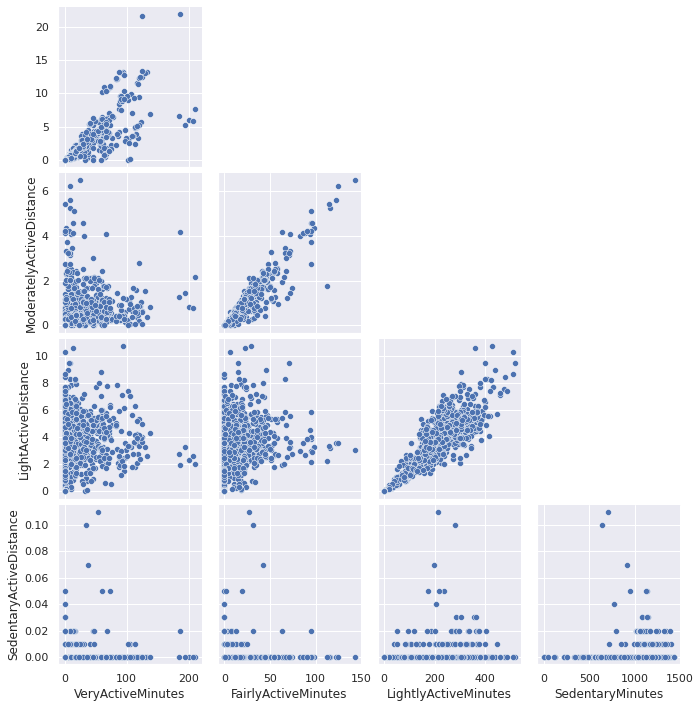

In [8]:
sns.pairplot(activity, 
             x_vars = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'],
             y_vars = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'],
             height = 2.5, corner = True)

from the pairplot below we can see that Distance and Minutes always goes together 
except from being sedentary, since when we stay still, if the distance increases it won't make any sense right?
Hence, we are going to remove 'distance' columns because they are indicated in 'minutes' columns already so we don't need both.
This applies the same with ['TotalSteps', 'TotalDistance', 'TrackerDistance']. 
I am going to keep 'TotalSteps' since it's easier to imagine how many steps it is than 'kilometers'

In [9]:
activity['LoggedActivitiesDistance'].describe()
# I am also going to remove 'LoggedActivitiesDistance' since most of them are zeros and I don't know what it does.

count    940.000000
mean       0.108171
std        0.619897
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.942142
Name: LoggedActivitiesDistance, dtype: float64

In [10]:
activity.drop(columns = [ 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
                        'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'], inplace = True)

In [11]:
# I noticed that the 'ActivityDate' wasn't in datetime type yet. So, I'm going to convert it to datetime type.
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
hr_steps['ActivityHour'] = pd.to_datetime(hr_steps['ActivityHour'])
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    940 non-null    int64         
 1   ActivityDate          940 non-null    datetime64[ns]
 2   TotalSteps            940 non-null    int64         
 3   VeryActiveMinutes     940 non-null    int64         
 4   FairlyActiveMinutes   940 non-null    int64         
 5   LightlyActiveMinutes  940 non-null    int64         
 6   SedentaryMinutes      940 non-null    int64         
 7   Calories              940 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 58.9 KB


In [12]:
activity['Id'].value_counts()

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

First, we are going to count how many days each participant provided their data.
I saw that there is one participant who only provide 4 days of data which is too small and could potentially misdirect our analysis.
Hence, I'm going to remove it.

In [13]:
activity.drop(activity[activity['Id'] == 4057192912].index, inplace = True)

# Analysis : seeing how long do participants wear smart device throughout the day

In [14]:
# creating new columns : 'wear_percent' contains the wear time percentage each day, 
# 'wear_cat' catagorize wear_percent into catagories where
# 0-25% -> barely
# 25-50% -> less than half of the day
# 50-75% -> more than half of the day
# 75-100% -> most of the day

activity['wear_percent'] = (activity['VeryActiveMinutes'] + activity['FairlyActiveMinutes'] + activity['LightlyActiveMinutes'] + activity['SedentaryMinutes']) / 1440 * 100
activity['wear_cat'] = pd.cut(activity['wear_percent'], [0, 25, 50 ,75, 100], labels = ['barely', 'less than half day', 'more than half day', 'most of the day'])
activity.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,wear_percent,wear_cat
0,1503960366,2016-04-12,13162,25,13,328,728,1985,75.972222,most of the day
1,1503960366,2016-04-13,10735,21,19,217,776,1797,71.736111,more than half day
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,100.000000,most of the day
3,1503960366,2016-04-15,9762,29,34,209,726,1745,69.305556,more than half day
4,1503960366,2016-04-16,12669,36,10,221,773,1863,72.222222,more than half day


In [15]:
# counting each catagory
wear_cat_count = activity.groupby('wear_cat').count()['Id'].reset_index().rename(columns = {'Id':'count'})
wear_cat_count

,wear_cat,count
0,barely,9
1,less than half day,16
2,more than half day,346
3,most of the day,565


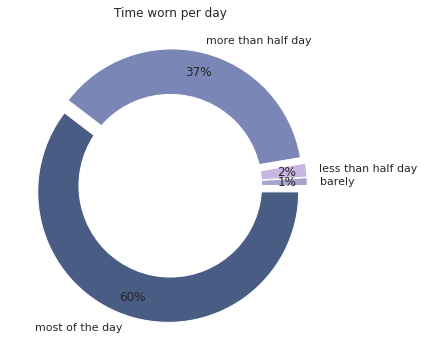

In [16]:
plt.figure(figsize = (6, 6))
colors = ['#A8A4CE', '#C8B6E2', '#7A86B6', '#495C83']
explode = (0.05,0.05,0.05,0.05)

plt.pie(wear_cat_count['count'], labels=wear_cat_count['wear_cat'], autopct='%.0f%%', colors=colors, explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.title('Time worn per day')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

From the graph above, we can see that more than 97% of participants have been wearing smart device more than half of the day.
Hence, we are going to remove the case where participants used smart device less than half day since it is only the minority of samples and it could misdirect our analysis.

In [17]:
# removing 'wear_cat' == less than half day or barely
activity = activity[(activity['wear_cat'] != 'less than half day') & (activity['wear_cat'] != 'barely')]
wear_cat_count = activity.groupby('wear_cat').count()['Id'].reset_index().rename(columns = {'Id':'count'})
wear_cat_count

,wear_cat,count
0,barely,0
1,less than half day,0
2,more than half day,346
3,most of the day,565


# Analysis : Finding average sedentary time 

In [18]:
# inner joining for matching 'Id' and 'Date'
merged_act_sleep = pd.merge(activity, sleep, left_on = ['Id', 'ActivityDate'], right_on = ['Id', 'SleepDay'], how =  'inner')
merged_act_sleep.drop(columns = ['SleepDay'], inplace = True)
merged_act_sleep.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,wear_percent,wear_cat,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,25,13,328,728,1985,75.972222,most of the day,1,327,346
1,1503960366,2016-04-13,10735,21,19,217,776,1797,71.736111,more than half day,2,384,407
2,1503960366,2016-04-15,9762,29,34,209,726,1745,69.305556,more than half day,1,412,442
3,1503960366,2016-04-16,12669,36,10,221,773,1863,72.222222,more than half day,2,340,367
4,1503960366,2016-04-17,9705,38,20,164,539,1728,52.847222,more than half day,1,700,712


In [19]:
sit_hr = ((merged_act_sleep['SedentaryMinutes'] - merged_act_sleep['TotalTimeInBed']) / 60)
sit_hr = sit_hr[sit_hr >= 0]
print('Average daily sitting time : ' + str(np.around(sit_hr.mean(), 1)) + ' hrs')

Average daily sitting time : 5.3 hrs


In [20]:
# creating dataframe for pie chart
plot_df = [sit_hr.mean(), merged_act_sleep['TotalTimeInBed'].mean() / 60]
plot_df.append(24 - plot_df[0] - plot_df[1])
plot_df

[5.322064393939394, 7.5073931623931625, 11.170542443667445]

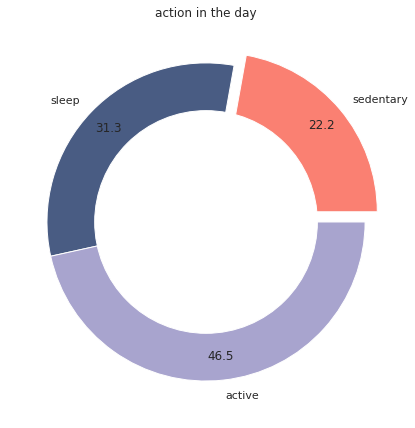

In [21]:
plt.figure(figsize = (6, 6))
colors = ['salmon', '#495C83', '#A8A4CE']
explode = (0.1,0,0)

plt.pie(plot_df, labels=['sedentary', 'sleep', 'active'], autopct=lambda x: '{:.1f}'.format(x), colors=colors, explode=explode, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.title('action in the day')
plt.show()

Participants have been staying stationary on average of 5.3 hours during the day.
This can leads to chronic muscular injuries (neck, shoulder, back, etc.) if the habit continues. 
Therefore, **BellaBeat app could notify the users that they've been sitting for too long and encourages them to change posture and stretch for a few seconds**.
The app can even **recommend specific stretch exercises** according to the users' current physical problem (by their inputs, eg. stiff neck, shoulder pain). This solution can help users create heathier habits which benefit their own health in the long run.

# Analysis : Looking at 'hr_steps' #

We are going to find when participants are more active throughout the day.

In [22]:
# putting date and time into seperated column
hr_steps['date'] = [x.date() for x in hr_steps['ActivityHour']]
hr_steps['hr'] = hr_steps['ActivityHour'].dt.hour
hr_steps = hr_steps[['Id', 'date', 'hr', 'StepTotal']]

In [23]:
hr_steps.head()

,Id,date,hr,StepTotal
0,1503960366,2016-04-12,0,373
1,1503960366,2016-04-12,1,160
2,1503960366,2016-04-12,2,151
3,1503960366,2016-04-12,3,0
4,1503960366,2016-04-12,4,0


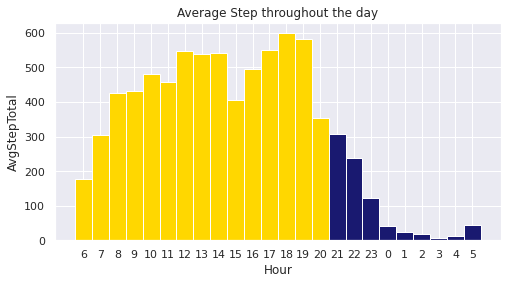

In [24]:
plot_df = hr_steps[['hr', 'StepTotal']].groupby('hr').mean().rename(columns={'StepTotal':'AvgStepTotal'})

# set order of hours
hour_order = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5]

# calculate frequencies of each hour and sort them
plot_df = plot_df.loc[hour_order].reset_index()

# day / night colour split
day_mask = ((6 <= plot_df['hr']) & (plot_df['hr'] <= 20))
plot_df['color'] = np.where(day_mask, 'gold', 'midnightblue')

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

ax.bar(
    x=plot_df['hr'].astype(str),
    height=plot_df['AvgStepTotal'],
    color=plot_df['color'], width=1)

ax.set_xlabel('Hour')
ax.set_ylabel('AvgStepTotal')
ax.set_title('Average Step throughout the day')
plt.show()

We can see that users are more active during the lunch between 12pm - 2pm and during evening between 5pm - 7pm. 

# Analysis : Sleep

In [25]:
sleep[['Id', 'TotalTimeInBed', 'TotalMinutesAsleep']].groupby('Id').mean().nsmallest(5, columns = ['TotalMinutesAsleep'])

,TotalTimeInBed,TotalMinutesAsleep
Id,,
2320127002,69.000000,61.000000
7007744171,71.500000,68.500000
4558609924,140.000000,127.600000
3977333714,461.142857,293.642857
1644430081,346.000000,294.000000


In [26]:
# seeing sleep time for each day
sleep['day_of_week'] = sleep['SleepDay'].apply(lambda time : time.weekday())
week_day_map = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
sleep['day_of_week'] = sleep['day_of_week'].apply(lambda time : week_day_map[time])
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [27]:
plot_df = sleep[['day_of_week', 'TotalMinutesAsleep', 'TotalTimeInBed']].groupby('day_of_week').mean()

reorder_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot_df = plot_df.reindex(reorder_list).reset_index()

# for this one, I want to try using seaborn to plot multiple columns bar chart. So, I have to reshape dataframe to wide type.
wide_plot_df = plot_df.melt('day_of_week', var_name='columns', value_name='value')
wide_plot_df['value'] = wide_plot_df['value'] / 60
wide_plot_df.head()

,day_of_week,columns,value
0,Monday,TotalMinutesAsleep,6.991667
1,Tuesday,TotalMinutesAsleep,6.742308
2,Wednesday,TotalMinutesAsleep,7.244697
3,Thursday,TotalMinutesAsleep,6.688281
4,Friday,TotalMinutesAsleep,6.757018


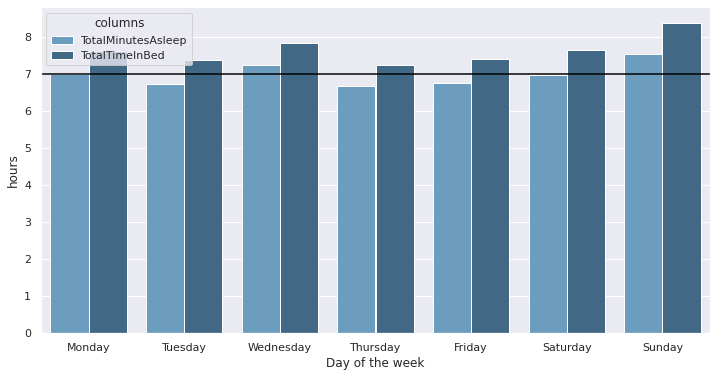

In [28]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='day_of_week', y='value', hue='columns', data=wide_plot_df, palette='Blues_d')
ax.axhline(7, color='black')
ax.set_xlabel('Day of the week')
ax.set_ylabel('hours')
plt.show()

We can see that on weekdays participants **tend to sleep less than recommended sleep hour** (at least 7 hours a day). BellaBeat can create a feature that **notify the users if they do not sleep enough**. To reduce time in bed before the users fall asleep, **BellaBeat can recommend podcasts, asmr, relaxing music** to help them fall asleep faster.

# Act : Recommended Ideas

After exploring the data and analyzing the data, here are some ideas to improve BellaBeat products.

Products
*  According to our data analysis, almost all people wear smart device all day, BellaBeat's smart device should look stylish and be lightweight to encourages customers to buy and wear them.

App
* BellaBeat app could notify the users when they've been sitting for too long and tell them to change posture or stretch for a few seconds. The app can also recommend them stretch exercise according to their current health problem.
* BellaBeat app could calculate sleeping time for their users by using their wake-up time or alarm clock time in order to get enough hours of sleep.
* BellaBeat app could recommend podcasts, asmr, relaxing music to help the users fall asleep faster.

Extra potential ideas (need further analysis)
* To motivate the users to exercise more, BellaBeat app could notify the users how many other BellaBeat's users in their area are taking a walk or exercising.

# Self Feedback
From this project I learned lots of things, from finding the goals of the project, preparing data, cleaning data, analyzing data and visualizing them. I also learn that how to be creative on the ways to approach the data and creating solutions for them. After finishing this project, I feel more confident to start doing other new projects and hopefully find my way on this 'data' career path.